# Pattern Recognition (Text Cases) ✨🧑‍💻
### main job : membandingkan tingkat kemiripan 10 abstrak makalah IJCCS
### kasus 1 : cosine similiarity and TF-IDF

---

### Nama : Bagus Cipta Pratama
### NIM : 23/516539/PA/22097
---

## import package dan fungsionalitas yang diperlukan 📚

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

perlu diperhatikan disini bahwa saya menggunakan package yang khusus digunakan untuk pemrosesan teks . disini saya menggunakan TfidfVectorizer dari scikit-learn untuk mengubah teks menjadi representasi numerik, dan cosine_similarity digunakan untuk mengukur kemiripan antara pasangan dokumen. Selain itu, stopwords dan word_tokenize dari NLTK digunakan untuk pemrosesan teks seperti menghapus kata-kata umum (stopwords) dan memecah teks menjadi kata-kata individual.

---

## memasukkan abstrak ke dalam satu list 📝

In [10]:
abstracts = [
    """BPJS Kesehatan plays a crucial role in providing affordable access to healthcare services and reducing individual financial burdens. However, deficit issues can disrupt the sustainability of the program, making anomaly detection highly important to conduct.
    Previous research on unsupervised anomaly detection in BPJS Kesehatan revealed a limitation with Simple Linear Regression (SLR), which only accommodates linear relationships among independent variables and the target variable of BPJS Kesehatan claim values. 
    Minister of Health Regulation No. 52 of 2016 identified eight influential non-linear independent variables, leading to the proposal of Support Vector Regression (SVR) to address SLR's shortcomings.
    Research findings demonstrate SVR's superior anomaly detection performance over SLR. Interestingly, the SVR model excels in anomaly detection but lacks in prediction. 
    Optimal tuning of SVR hyperparameters (C=9, epsilon=90, gamma=0.009, residual anomaly definition > 0.5*RMSE for both datasets) yields impressive metrics: Accuracy=0.97, Precision=0.84, Recall=0.97, and F1-Score=0.90. The anomaly detection results are expected to greatly support the sustainability of the BPJS Kesehatan program in Indonesia.""",
    
    """There are many aspects of readiness that must be considered when implementing technological breakthroughs, the business sector is still relatively slow in adopting blockchain technology. However, considering that blockchain technology is still in its early stages of development and has many potential applications, it is necessary to conduct empirical studies on the factors influencing its application in the industry. 
    The problem of this study is to develop an appropriate framework based on how well its features match the needs of the business sector. This research method uses data collection using online questionnaires to obtain information from 86 respondents. The current study also utilizes the Smart PLS 4 model to produce a structural hypothetical model. The results of this study find a significant influence on Revolutionary Innovation by enriching the literature on the relationship between Blockchain, Big Data and the Business Sector, which is expanded by adding new variables. 
    The novelty of this research identifies potential utilization, analyzes internal and external factors, and identifies how blockchain disrupts the business sector. The purpose of this study is to assess how blockchain technology is currently used in the business sector for data provision as a theoretical information technology innovation",
    "Exploring the potential of machine learning in medical diagnostics.""",
    
    """ The internet of things generates various types of data traffic with a very large amount of data traffic which has an impact on security issues, one of which is an attack on the Internet of Things network. 
    In the IoT data traffic flow, which contains various data, it turns out that the portion of attack data traffic is usually smaller than normal traffic. Therefore, the attack detection method must be able to recognize the type of attack on a very large data traffic flow and unbalanced data. 
    High data dimensions and unbalanced data are one of the challenges in detecting attacks. To overcome the large data dimensions, Chi-square was chosen as a feature selection technique. In this study, the ensemble method is proposed to improve the ability to detect anomalies in unbalanced data. To produce an ideal detection method, a combination of several classification algorithms such as Bayes Network, Naive Bayes, REPtree and J48 is used. The CICIDS-2017 dataset is used as experimental data because it has a high data dimension which contains unbalanced data. The test results show that the proposed Ensemble method can improve the performance of anomaly detection for high-dimensional data containing unbalanced data""" ,

    """ Buses are one of the most widely chosen transportation methods to support the mobility of the Indonesian people. Mobility that is often found in addition to public transportation, is also often found in the mobility of tourism tour activities for a travel group. 
    The number of tourist destinations to which passengers go up and down makes the assistant bus driver or group leader work hard to ensure that the number of passengers boarding the bus matches the number of groups. It often takes a long time to ensure the accuracy of the number of passengers before departure to the next destination. This conventional method results in the delay of the tourism tour schedule. In this research, the author designs a webcam-based bus passenger face detection system using the Single Shot Detector (SSD) method that can provide real-time information to bus drivers, assistant bus drivers or group leaders. 
    The results obtained by the system obtained an achievement of 95% of the total system creation along with testing the detection of bus passenger faces in actual conditions resulted in an average accuracy of 77.5%.""" ,
    
    """ Indonesia is a country with a unique geography. The confluence of three tectonic plates located in the country results in frequent natural disasters, from earthquakes to volcanic activity. BMKG is a monitoring agency tasked with providing information related to these natural disasters. 
    However, one type of natural disaster data, the SIGMET data (Significant Meteorological Information) used to provide information on volcanic ash, has a complicated format that is difficult for ordinary people to understand. Therefore, this research seeks to make finding information related to volcanic ash and volcanic eruptions in Indonesia easier in terms of access and comprehension.
    In this research, an application design will be carried out that can search SIGMET data by implementing natural language processing with a production rule base. The research results have an accuracy rate of 84% using 25 test sample sentences that combine sentences and words contained in the important words section.""" ,
    
    """ Digital money is the fundamental driving factor behind today's modern economy. Credit/debit cards, e-wallets, and other contactless payment options are widely available nowadays. This also raises the security risk associated with passwords in online transactions. 
    One-time passwords (OTPs) are another option for mitigating this. A one-time password (OTP) serves as an additional password authentication or validation technique for each user authentication session. Failures in transmitting OTP passwords through SMS can arise owing to operator network faults or technological concerns.
    To minimize the risk value that arises in online transactions, it is necessary to evaluate the causality of the OTP SMS sending transaction status category by determining the main factors for successful OTP SMS sending and identifying the causes of failure when sending OTP SMS using the Bayesian Network method. According to data analysis, online transactions occur more frequently in the morning, with status summaries such as no delay, unknown status, and others. Furthermore, there is causality with at least three variables in the principal status summary, including no delay, uncertain summary, long delay, normal, likely operator issues, abnormal, and more. With a high accuracy rate of around 90% in forecasting the likelihood of recurrence.""" ,

    
    """ Despite the system previously utilizing optimal query configurations and database settings, the transaction table in the database, which is undergoing significant numerical increases and notable queries and updates on each line, has seen a drop in query speeds simultaneous with data growth. 
    This situation arises due to an increase in disk space in the database tablespace, which results from block fragmentation. At times, database engines do not detect this problem, thereby overlooking it in the database recommendation engine. 
    Lacking an understanding of the fundamental issue, database engineers need analysis and strategies to maintain the query speed of the transaction table in the relational database """ ,
    
    """ Sales is an activity or business selling a product or service. In this study, I took a case study on Kaggle. Sales problems at the company cause inventory to be very high or vice versa, causing a loss of sales because there are no items to sell. Inventory that is too high results in increased costs due to existing resources being inefficient. In the opposite condition, it will cause a product vacancy in the market. 
    Using the Recurrent Neural Network (RNN) Algorithm, this study predicts sales. The data used is sales data in 2020 with the parameter Number of sales per day in the last four months. 
    The results obtained through testing several training scenarios and testing the implementation of the algorithm, in this case, is the highest accuracy value of 96.92% in the network architecture of three input neuron layers, three hidden layer neurons, one output, division of training, and test data 70: 30, learning value rate of 0.9 and a maximum of 9000000 epochs """ ,
    
    """ The field of information technology requires software, which has significant issues. Quality and reliability improvement needs damage prediction. Tree-based algorithms like Random Forest, Deep Forest, and Decision Tree offer potential in this domain. However, proper hyperparameter configuration is crucial for optimal outcomes. 
    This study demonstrates the use of Random Search Hyperparameter Setting Technique to predict software defects, improving damage estimation accuracy. Using ReLink datasets, we found effective algorithm parameters for predicting software damage. 
    Decision Tree, Random Forest, and Deep Forest achieved an average AUC of 0.73 with Random Search. Random Search outperformed other tree-based algorithms. The main contribution is the innovative Random Search hyperparameter tuning, particularly for Random Forest. Random Search has distinct advantages over other tree-based algorithms """,

    """ Drone object detection is one of the main applications of image processing technology and pattern recognition using deep learning. However, the limited drone image data that can be accessed for training detection algorithms is a challenge developing drone object detection technology. Therefore, many studies have been conducted to increase the amount of drone image data using data augmentation techniques. This study aims to evaluate the effect of data augmentation on deep learning accuracy in drone object detection using the YOLOv5 algorithm. The methods used in this research include collecting drone image data, augmenting data with rotate, crop, and cutout, training the YOLOv5 algorithm with and without data augmentation, as well as testing and analyzing training results.
The results of the study show that data augmentation can't improve the accuracy of the YOLOv5 algorithm in drone object detection. Evidenced by the decreasing value of precision and mAP@0.5 and the relatively constant value of recall and F-1 score. This is caused by too much augmentation, which can cause a loss of important information in the data and cause noise or distortion. """
]

In [11]:
len(abstracts)

10

Dalam konteks ini, list abstracts saya gunakan sebagai data input yang nantinya akan dianalisis untuk mengetahui seberapa besar kemiripan antara satu abstrak dengan abstrak lainnya.

---

## Pemrosesan Teks 🔧

In [15]:
def preprocess_text(text):
    stop_words = set(stopwords.words("english"))
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

Saya melakukan tahapan preprocessing teks agar data yang digunakan lebih proper untuk analisis. Pertama, saya mengambil stopwords , yaitu kata-kata umum yang tidak memberikan informasi penting, dan menyimpannya dalam bentuk set untuk mempermudah pencarian. Selanjutnya, saya mengubah seluruh teks menjadi huruf kecil untuk menjaga konsistensi dan menghindari perbedaan akibat kapitalisasi. Setelah itu, saya menghapus tanda baca karena tanda baca tidak memberikan informasi yang relevan. Kemudian, saya melakukan tokenisasi, yaitu memecah teks menjadi kata-kata atau token untuk mempermudah analisis kata per kata. Token yang termasuk dalam daftar stopwords selanjutnya saya hapus, sehingga hanya kata-kata yang relevan yang tersisa. Terakhir, saya menggabungkan kembali token yang tersisa menjadi kalimat baru yang bersih dan siap untuk analisis lebih lanjut.isis lanjutan.

---

## Menerapkan Pemrosesan pada Setiap Abstrak 

In [19]:
preprocessed_abstracts = [preprocess_text(abstract) for abstract in abstracts]

simply menerapkan preprocessing ke abstract

---

## Vektorisasi Menggunakan TF-IDF 

In [23]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_abstracts)

disini saya melakukan vektorisasi teks menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency), yang mengubah kumpulan abstrak yang telah diproses sebelumnya menjadi matriks numerik (TF-IDF matrix) untuk menggambarkan pentingnya setiap kata dalam konteks dokumen-dokumen tersebut.

---

## Menghitung Cosine Similarity antara Abstrak 

In [55]:
similarity_matrix = cosine_similarity(tfidf_matrix)

kemudian saya menghitung kemiripan kosinus antar semua pasangan dokumen menggunakan matriks TF-IDF, menghasilkan matriks kemiripan yang menunjukkan seberapa mirip setiap dokumen satu sama lain berdasarkan isi teksnya.

### 🤔QnA : apa itu cosine similiarity dan cara kerjanya ?
**Cosine Similarity** adalah ukuran untuk mengukur kemiripan antara dua vektor dengan menghitung cosine sudut antara keduanya. Nilai berkisar antara -1 hingga 1, di mana 1 berarti sangat mirip, 0 berarti tidak ada kemiripan, dan -1 berarti berlawanan. Cara kerjanya adalah dengan membandingkan arah vektor (bukan panjangnya), sering digunakan untuk mengukur kemiripan teks yang telah diubah menjadi vektor numerik.emakin mirip.

---

## Mengonversi Matriks Kemiripan ke DataFrame 

In [57]:
similarity_df = pd.DataFrame(similarity_matrix, index=[f"Paper {i+1}" for i in range(len(abstracts))], columns=[f"Paper {i+1}" for i in range(len(abstracts))])

### 🤔QnA : untuk apa kita convert ke dataframe ? 
biar gampang visualisasi aja sih

In [34]:
# cek ni kode jalan apa engga 
similarity_df

,Paper 1,Paper 2,Paper 3,Paper 4,Paper 5,Paper 6,Paper 7,Paper 8,Paper 9,Paper 10
Paper 1,1.000000,0.028662,0.058004,0.038113,0.042010,0.008078,0.005318,0.002560,0.022213,0.064939
Paper 2,0.028662,1.000000,0.079266,0.018926,0.067889,0.039128,0.014523,0.074078,0.042830,0.110952
Paper 3,0.058004,0.079266,1.000000,0.037461,0.085751,0.050642,0.028645,0.111019,0.013483,0.203161
Paper 4,0.038113,0.018926,0.037461,1.000000,0.038943,0.030523,0.018090,0.047861,0.017428,0.046805
Paper 5,0.042010,0.067889,0.085751,0.038943,1.000000,0.014780,0.013182,0.055486,0.040057,0.083723
Paper 6,0.008078,0.039128,0.050642,0.030523,0.014780,1.000000,0.025825,0.045005,0.010272,0.027595
Paper 7,0.005318,0.014523,0.028645,0.018090,0.013182,0.025825,1.000000,0.015229,0.006658,0.020941
Paper 8,0.002560,0.074078,0.111019,0.047861,0.055486,0.045005,0.015229,1.000000,0.016573,0.159206
Paper 9,0.022213,0.042830,0.013483,0.017428,0.040057,0.010272,0.006658,0.016573,1.000000,0.050324
Paper 10,0.064939,0.110952,0.203161,0.046805,0.083723,0.027595,0.020941,0.159206,0.050324,1.000000


---

## Menampilkan Heatmap Cosine Similiarity

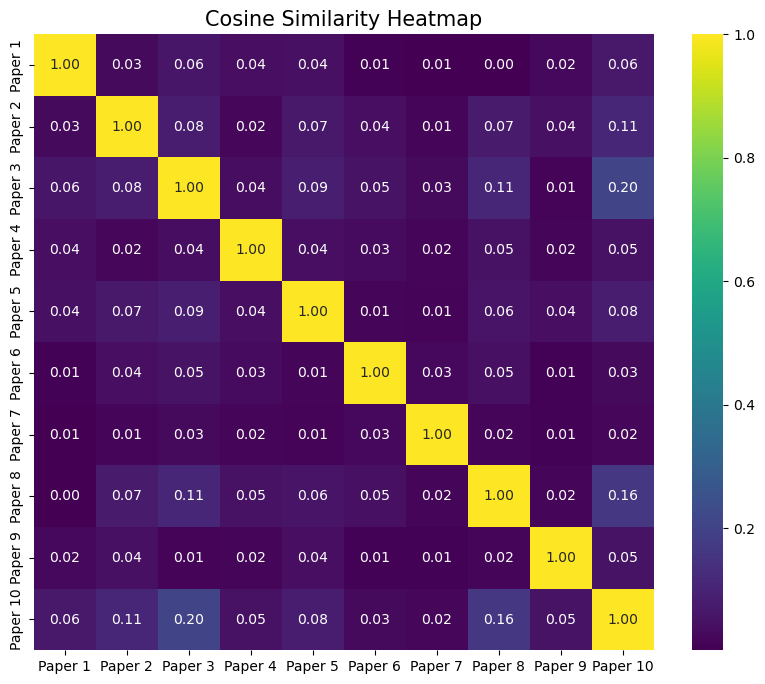

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="viridis", fmt=".2f", cbar=True)
plt.title("Cosine Similarity Heatmap", fontsize=15, loc='center')
plt.savefig("cosine_similarity_heatmapsss.png", dpi=300, bbox_inches='tight')
plt.show()

---

## Some conclusion and findings 🔍🕵️‍♂️

Heatmap Cosine Similarity ini menunjukkan tingkat kesamaan antara abstrak dari 10 paper di jurnal IJCCS. Nilai diagonal selalu 1.0 karena setiap abstrak identik dengan dirinya sendiri, sementara nilai di luar diagonal menunjukkan kesamaan antar abstrak yang relatif rendah, berkisar antara **0.00 hingga 0.20**. Pasangan dengan kesamaan tertinggi adalah **Paper 3 dan Paper 10** (0.20), yang mungkin membahas tema serupa, sementara beberapa pasangan, seperti **Paper 1 dan Paper 9**, memiliki kesamaan mendekati nol, menandakan perbedaan besar dalam isi abstrak.

Secara keseluruhan, rendahnya nilai Cosine Similarity di luar diagonal mencerminkan keberagaman topik yang dibahas dalam jurnal ini. Ini menunjukkan bahwa IJCCS berkontribusi pada berbagai tema penelitian, mendorong inovasi dan cakupan akademik yang luas. Pasangan dengan nilai kesamaan tertinggi dapat ditinjau lebih lanjut untuk mengidentifikasi potensi hubungan antar topik atau metode penelitian.

---

### Terima Kasih 🙏😊